In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from functions import (
    obj_segments,
    obj_segments_2,
    obj_segments_3,
    const_segments,
    tubular_reactor_model,
    sim_segments,
    const,
)

In [34]:
params = {
    "v": 0.1,  # m/s
    "L": 1,  # m
    "alpha": 0.058,  # 1/s
    "beta": 0.2,  # 1/s
    "gamma": 16.7,  #
    "delta": 0.25,  #
    "cin": 0.02,  # mol/L
    "Tin": 340,  # K
    "c_lb": 0,
    "c_ub": 0.02,
    "T_lb": 280,
    "T_ub": 400,
    "Tw_lb": 280,
    "Tw_ub": 400,
}


# Bounds, constraints and initial guess
x_lb = (params["Tw_lb"] - params["Tin"]) / params["Tin"]
x_ub = (params["Tw_ub"] - params["Tin"]) / params["Tin"]
bounds = [[x_lb, x_ub]]
bounds_segments = [[x_lb, x_ub]] * 10
init_guess = x_ub * np.ones(10)
con_segments = {"type": "ineq", "fun": lambda u: const_segments(u, params)}

In [38]:
# Optimization
weights = np.linspace(0, 1, 5)

conversions = []
Temperatues = []
z_multiple = []
T_multiple = []
Tw_multiple = []
for w1 in weights:
    res = minimize(
        lambda u: obj_segments_3(u, w1, params, print_vals=False),
        x0=init_guess,
        bounds=bounds_segments,
        method="SLSQP",
        constraints=con_segments,
    )

    _, conversion, temp = obj_segments_3(res.x, w1, params, print_vals=True, full_output=True)
    
    Temp = params['Tin'] * (1+temp)
    Temperatues.append(Temp)
    conversions.append(conversion[-1])


    z, c, T, Tw, x1, x2, x3 = sim_segments(res.x, params)
    z_multiple.append(z)
    T_multiple.append(T)
    Tw_multiple.append(Tw)

In [36]:
print(x_lb, x_ub)

-0.17647058823529413 0.17647058823529413


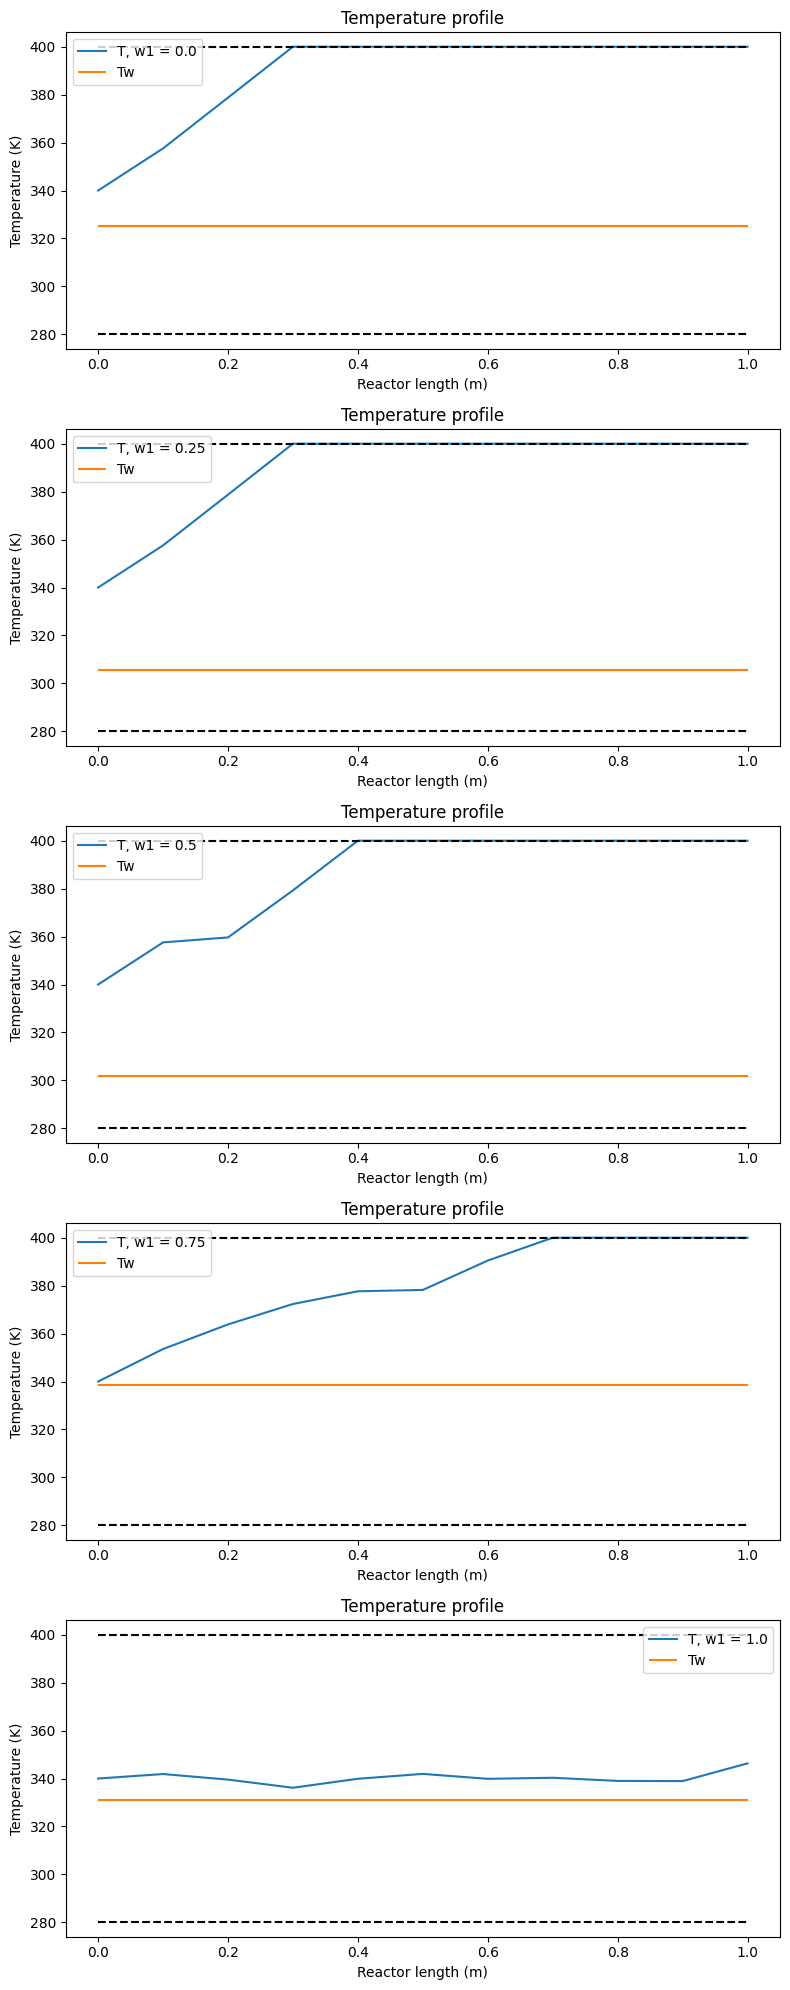

In [42]:
fig, axs = plt.subplots(len(T_multiple), 1, figsize=(8, 20))

#axs[0].plot(conversions, Temperatues, marker='o', label='Optima')
#axs[0].set_xlabel("Conversion")
#axs[0].set_ylabel("Temperature (K)")
#axs[0].set_title('Pareto front for objective III')
#axs[0].set_xlim([0.9, 1])
#axs[0].legend()

for i in range(len(T_multiple)):
    axs[i].plot(z_multiple[i], T_multiple[i], label='T, w1 = {}'.format(weights[i]))
    axs[i].hlines(y=Tw[i], label="Tw", xmin=z[0], xmax=z[-1], color="tab:orange")
    axs[i].hlines(y=280, xmin=z[0], xmax=z[-1], color="black", linestyle="--")
    axs[i].hlines(y=400, xmin=z[0], xmax=z[-1], color="black", linestyle="--")
    axs[i].set_xlabel("Reactor length (m)")
    axs[i].set_ylabel("Temperature (K)")
    axs[i].set_title('Temperature profile')
    axs[i].legend()


plt.tight_layout()

plt.show()

In [ ]:
# Optimization
weights = np.linspace(0, 1, 10)

conversions = []
Temperatues = []
for w1 in weights:
    res = minimize(
        lambda u: obj_segments_2(u, w1, params, print_vals=False),
        x0=init_guess,
        bounds=bounds_segments,
        method="SLSQP",
        constraints=con_segments,
    )

    _, conversion, temp = obj_segments_2(res.x, w1, params, print_vals=True, full_output=True)
    Temp = params['Tin'] * (1+temp)
    Temperatues.append(Temp[-1])
    conversions.append(conversion[-1])

In [ ]:



fig, ax = plt.subplots()

ax.plot(conversions, Temperatues, marker='o', label='Optima')
ax.set_xlabel("Conversion")
ax.set_ylabel("Temperature (K)")
ax.set_title('Pareto front for objective II')
ax.set_xlim([0.98, 1])
ax.legend()
plt.show()